In [10]:
video_file = input("Please input video file")

In [11]:
from vidstab import VidStab

# Using defaults
stabilizer = VidStab()
stabilizer.stabilize(input_path=video_file, output_path="stable_video.avi")

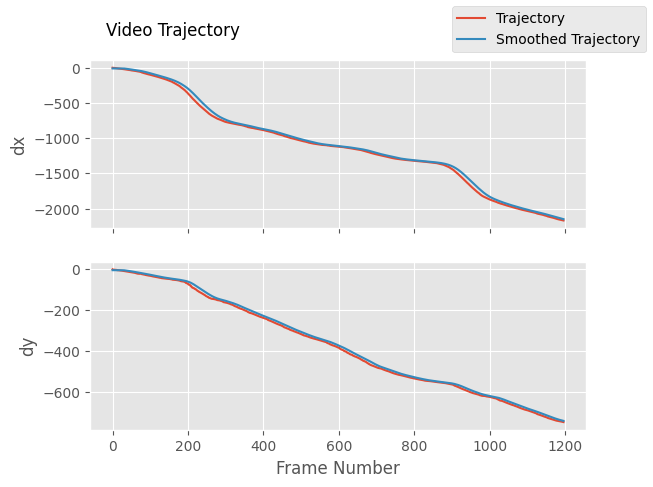

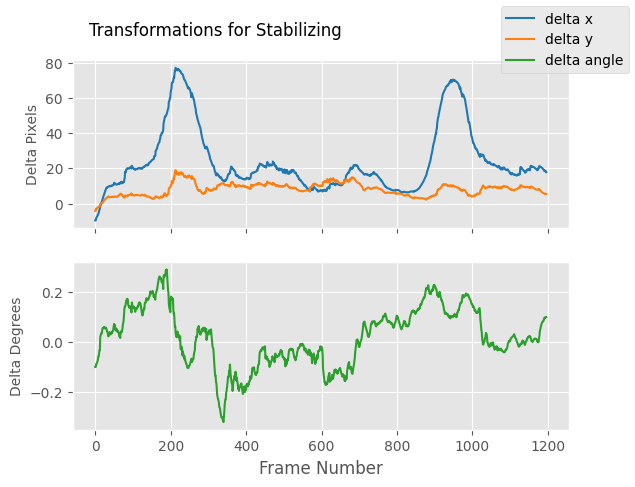

In [12]:
import matplotlib.pyplot as plt

stabilizer.plot_trajectory()
plt.show()

stabilizer.plot_transforms()
plt.show()

In [4]:
import os
import cv2
from vidstab import VidStab

# Initialize object tracker, stabilizer, and video reader
object_tracker = cv2.TrackerCSRT_create()
stabilizer = VidStab()
vidcap = cv2.VideoCapture(video_file)

# Initialize bounding box for drawing rectangle around tracked object
object_bounding_box = None

while True:
    grabbed_frame, frame = vidcap.read()

    # Pass frame to stabilizer even if frame is None
    stabilized_frame = stabilizer.stabilize_frame(input_frame=frame, border_size=50)

    # If stabilized_frame is None then there are no frames left to process
    if stabilized_frame is None:
        break

    # Draw rectangle around tracked object if tracking has started
    if object_bounding_box is not None:
        success, object_bounding_box = object_tracker.update(stabilized_frame)

        if success:
            (x, y, w, h) = [int(v) for v in object_bounding_box]
            cv2.rectangle(stabilized_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display stabilized output
    cv2.imshow("Frame", stabilized_frame)

    key = cv2.waitKey(5)

    # Select ROI for tracking and begin object tracking
    # Non-zero frame indicates stabilization process is warmed up
    if stabilized_frame.sum() > 0 and object_bounding_box is None:
        object_bounding_box = cv2.selectROI(
            "Frame", stabilized_frame, fromCenter=False, showCrosshair=True
        )
        object_tracker.init(stabilized_frame, object_bounding_box)
    elif key == 27:
        break

vidcap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'TrackerCSRT_create'